# MODELO K-MEANS APLICADO A LOS EXOPLANETAS

In [29]:
#Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import matplotlib.gridspec as gridspec
from collections import Counter



In [2]:
# Data de los exoplanetas
df_exo = pd.read_csv("datasets proyecto final/all_exoplanets_2021.csv")
df_exo.head(2)

,No.,Planet Name,Planet Host,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days,Orbit Semi-Major Axis,...,Equilibrium Temperature,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Stellar Metallicity,Stellar Metallicity Ratio,Stellar Surface Gravity,Distance,Gaia Magnitude
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03000,1.29,...,NaN,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,93.1846,4.44038
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,1.53,...,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,125.3210,4.56216


In [3]:
# Elijo las variables que se han usado en el proyecto completo
df_exo = df_exo[['Planet Name', 'Discovery Method','Discovery Year', 'Discovery Facility', 'Orbital Period Days', 'Orbit Semi-Major Axis' , 'Mass', 'Eccentricity', 'Equilibrium Temperature', 'Distance', 'Gaia Magnitude']]
df_exo.head(2)

,Planet Name,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days,Orbit Semi-Major Axis,Mass,Eccentricity,Equilibrium Temperature,Distance,Gaia Magnitude
0,11 Com b,Radial Velocity,2007,Xinglong Station,326.03000,1.29,6165.6000,0.231,NaN,93.1846,4.44038
1,11 UMi b,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,1.53,4684.8142,0.080,NaN,125.3210,4.56216


In [4]:
# Aquí selecciono las variables que usaré para el algorirtmo K-means
exo_clustering = df_exo[['Orbital Period Days', 'Mass', 'Equilibrium Temperature', 'Distance', 'Gaia Magnitude']]
exo_clustering.head(2)

,Orbital Period Days,Mass,Equilibrium Temperature,Distance,Gaia Magnitude
0,326.03000,6165.6000,NaN,93.1846,4.44038
1,516.21997,4684.8142,NaN,125.3210,4.56216


PREPROCESAMIENTO

In [5]:
# Eliminamos los valores faltantes
exo_clustering = exo_clustering.dropna()

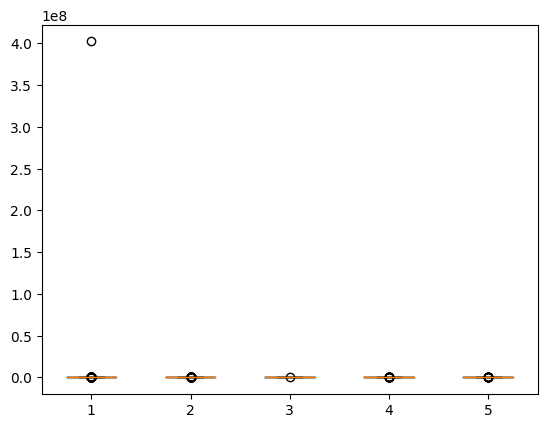

In [7]:
plt.boxplot(exo_clustering)
plt.show()

In [6]:
exo_clustering["Orbital Period Days"].max()

402000000.0

In [8]:
def eliminar_outliers(dataset):
    for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (dataset[col] < (Q1 - 1.5 * IQR)) | (dataset[col] > (Q3 + 1.5 * IQR))
        dataset = dataset[~outliers]
    return dataset
    

In [9]:
exo_clustering = eliminar_outliers(exo_clustering)


In [11]:
# Normalizamos las variables para evitar agrupamientos desproporcionados
scaler = preprocessing.MinMaxScaler()
exo_clustering_normal = scaler.fit_transform(exo_clustering)

In [12]:
# Ahora podemos observar todas las variables escaladas entre el 0 y el 1
pd.DataFrame(exo_clustering_normal).describe()

,0,1,2,3,4
count,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.248266,0.206195,0.423870,0.281967,0.505297
std,0.212076,0.227575,0.207607,0.230393,0.198929
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117770,0.012097,0.255935,0.091074,0.390555
50%,0.171363,0.145347,0.427088,0.242718,0.534446
75%,0.300664,0.316947,0.576833,0.412324,0.633214
max,1.000000,1.000000,1.000000,1.000000,1.000000


Vamos a determinar el número de clusters óptimo (K) en los que se dividirá el conjunto de datos.<br>
Esta vez, en vez de usar el método de codo, usaremos el método de la silueta, que se basa en el promedio entre cada puntos de datos y los puntos de su cluster. Considero que puede ser una forma de calcular el valor de K más preciso

In [13]:
silhouette_scores = []
K = range(2,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(exo_clustering_normal)
    score = silhouette_score(exo_clustering_normal, kmeans.labels_)
    silhouette_scores.append(score)

c:\Users\sjfer\Silvilio python upgrade hub\venv_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sjfer\Silvilio python upgrade hub\venv_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sjfer\Silvilio python upgrade hub\venv_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sjfer\Silvilio python upgrade hub\venv_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

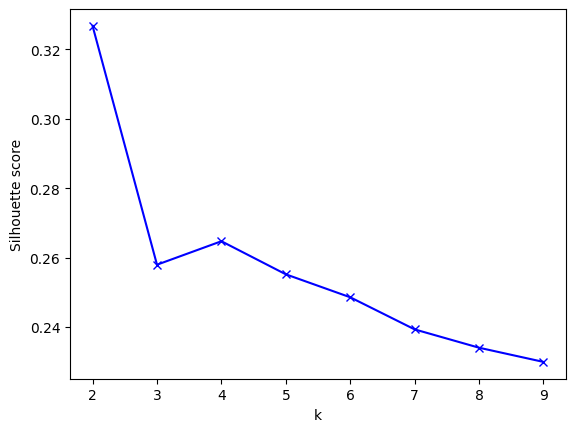

In [14]:
# El valor de K con la silueta promedio más alta se considera el número óptimo de clusters. Así que nos quedaremos con K = 2
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

In [15]:
# Aplicamos el entrenamiento con el número de cluster elegidos.
kmeans = KMeans(n_clusters=2).fit(exo_clustering_normal)

c:\Users\sjfer\Silvilio python upgrade hub\venv_analytics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Ahora volvemos a generar el dataframe concatenando el cluster con los datos originales
cluster = pd.DataFrame(kmeans.labels_)
clustered_exo = pd.concat((exo_clustering,cluster),axis = 1)
clustered_exo = clustered_exo.rename({0:'cluster'},axis=1)

In [18]:
clustered_exo.head(5)

,Orbital Period Days,Mass,Equilibrium Temperature,Distance,Gaia Magnitude,cluster
44,8.463000,17.00,593.0,9.72210,7.84038,0.0
45,18.859019,13.60,454.0,9.72210,7.84038,0.0
70,2.290700,3.95,464.0,8.60715,12.12320,1.0
77,1.508956,327.35,1898.0,787.90900,13.45700,1.0
78,13.240600,874.00,600.0,338.38600,14.66450,1.0


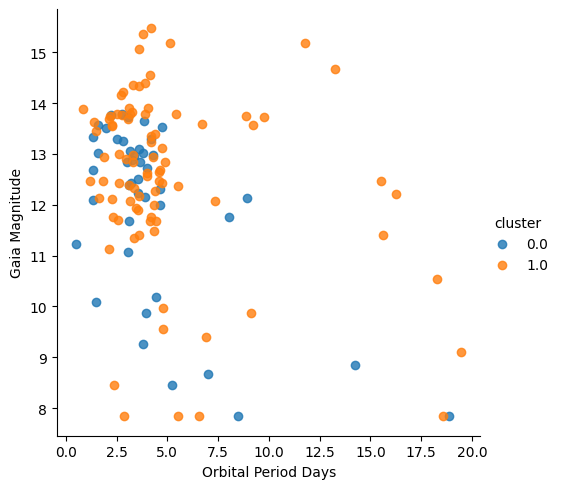

In [36]:
sns.lmplot(x = 'Orbital Period Days',y = 'Gaia Magnitude', data = clustered_exo, hue = 'cluster', fit_reg = False)


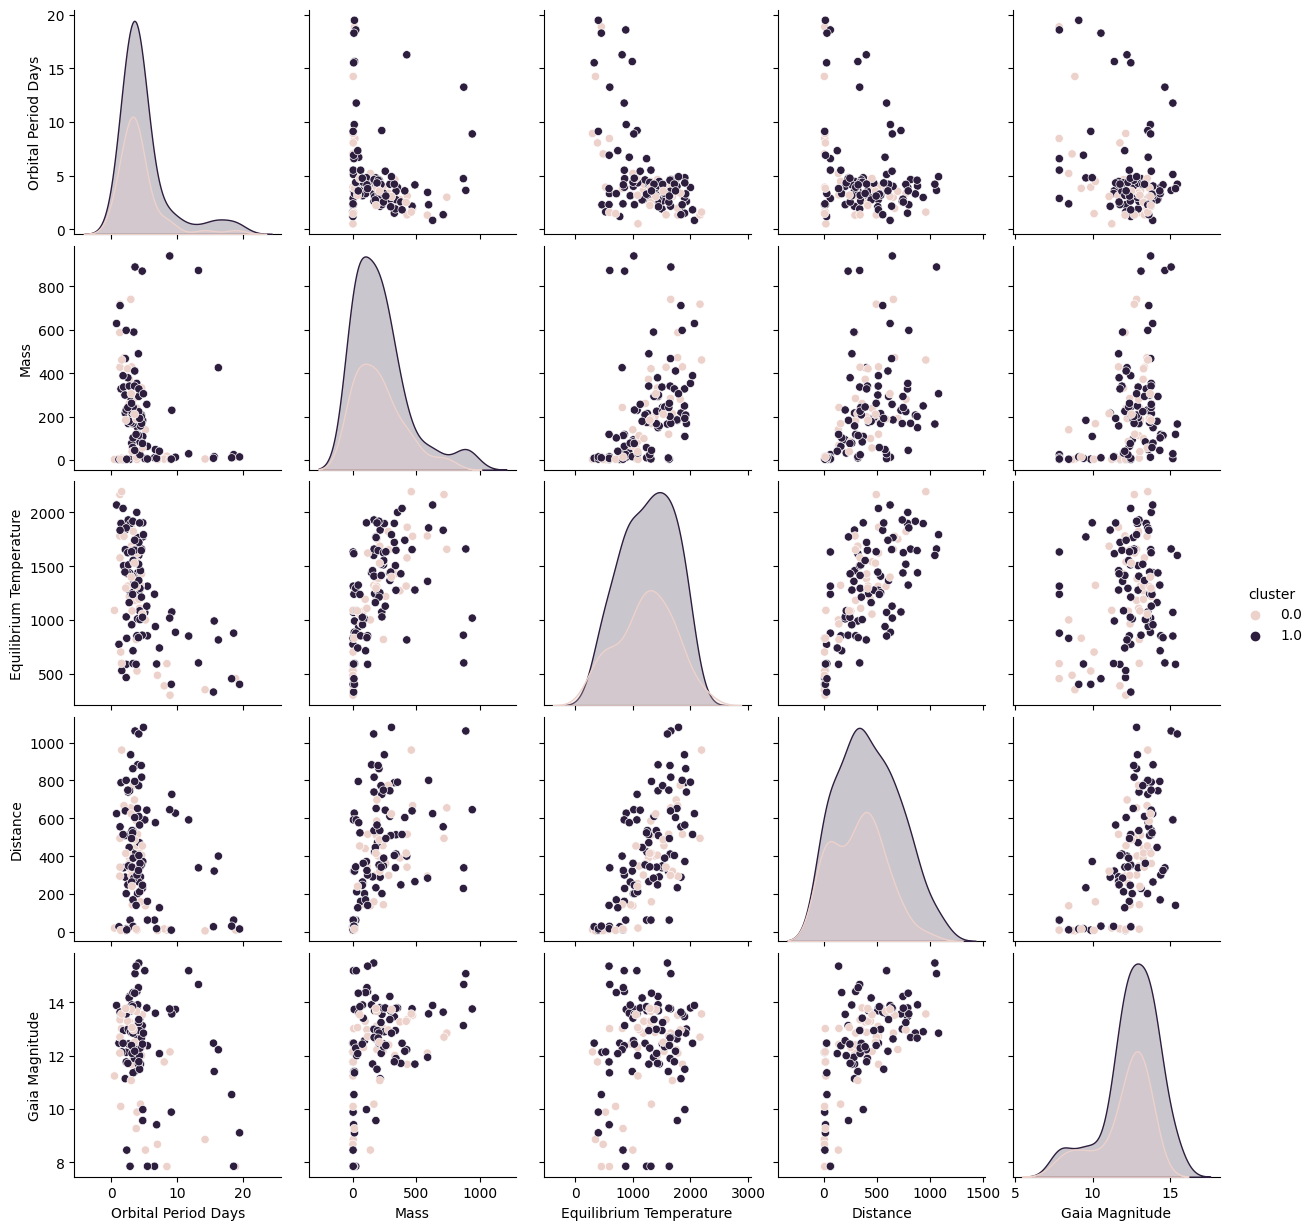

In [20]:
sns.pairplot(clustered_exo, hue ='cluster')

<AxesSubplot: xlabel='Constant', ylabel='Mass'>

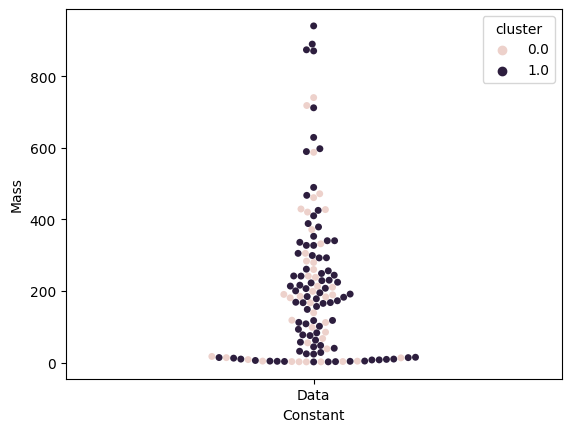

In [22]:
sns.swarmplot(x=clustered_exo['Constant'],y=clustered_exo['Mass'],hue=clustered_exo['cluster'])

<AxesSubplot: xlabel='Constant', ylabel='Mass'>

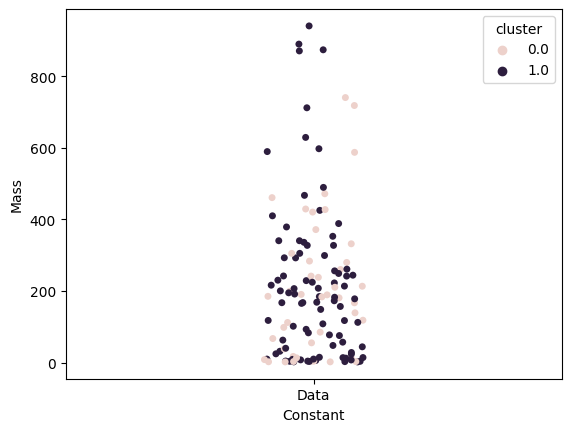

In [23]:
sns.stripplot(x=clustered_exo['Constant'],y=clustered_exo['Mass'],hue=clustered_exo['cluster'])

<AxesSubplot: xlabel='Constant', ylabel='Distance'>

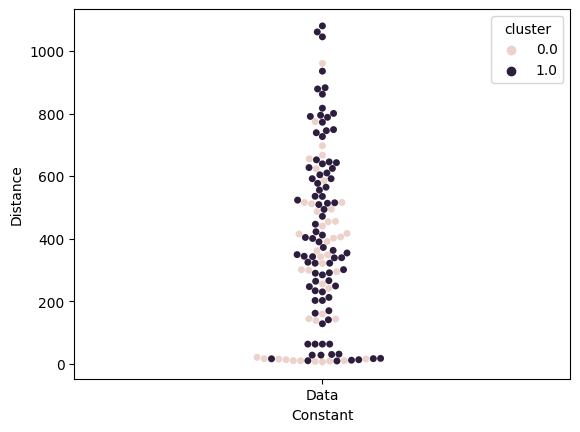

In [24]:
sns.swarmplot(x=clustered_exo['Constant'],y=clustered_exo['Distance'],hue=clustered_exo['cluster'])

<AxesSubplot: xlabel='Constant', ylabel='Equilibrium Temperature'>

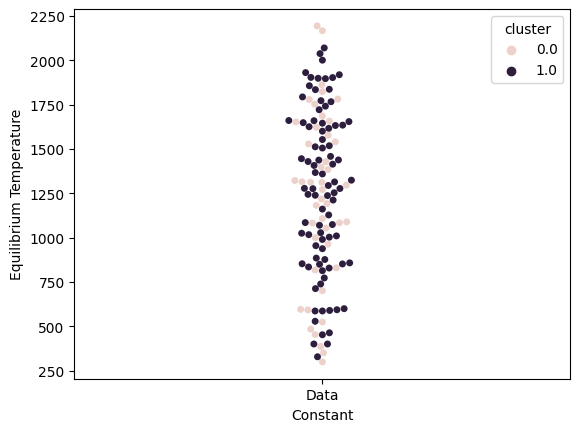

In [25]:
sns.swarmplot(x=clustered_exo['Constant'],y=clustered_exo['Equilibrium Temperature'],hue=clustered_exo['cluster'])

Para evaluar la calidad del modelo de clustering, se van a usar dos medidas:
- La suma de los cuadrados intra-cluster (SSE)
- Índice de silueta.

In [31]:
# Calcular la suma de los cuadrados intra-cluster (SSE)
sse_clustered_exo = kmeans.inertia_
sse_clustered_exo

63.26035630844588

Cuanto menor sea el valor de SSE, mayor será la cohesión de los puntos de datos dentro de cada cluster. En tu caso, el valor de SSE es 63.26, lo que sugiere que los puntos de datos dentro de cada cluster están bastante cohesionados.

In [33]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(exo_clustering, kmeans.labels_)
silhouette_avg

0.396609038428361

Por otro lado, el índice de silueta es una medida que evalúa tanto la cohesión dentro de cada cluster como la separación entre clusters.
El valor de este índice oscila entre -1 y 1, siendo los valores más cercanos a 1 los que indican una mejor calidad de clustering. En este caso, el valor de índice de silueta es 0.39, lo que indica una separación moderada entre los clusters.